In [1]:
import matplotlib.pyplot as plt
import spikeinterface
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
import os

In [2]:
block_index = []
output = os.listdir(os.getcwd())
for file in output:
    if file.endswith('.ns6'):
        print('Find ns6 file:', file[-7:-4])
        block_index.append(int(file[-7:-4]))

block_index.sort()
print('Block index:', block_index)

recording_list = []

for k in range(len(block_index)):
    recording = se.BlackrockRecordingExtractor(r'datafile00'+str(block_index[k])+'.ns6',stream_id='6',block_index=k)
    recording = recording.channel_slice([str(i+1) for i in range(32)])
    recording_list.append(recording)

    print(recording.get_num_samples())

Block index: []


In [ ]:
# Data lengths here/in BlackRock/After Kilosort are different. It is possibly caused by zero-padding.
temp = recording_list[0].frame_slice(0,100)
temp = temp.get_traces()
temp = temp[:,0]
print(temp)
plt.plot(temp)
plt.show()

In [ ]:
rec = si.concatenate_recordings(recording_list)
print(rec)
s = rec.get_num_samples(segment_index=0)
print(f'segment {0} num_samples {s}')

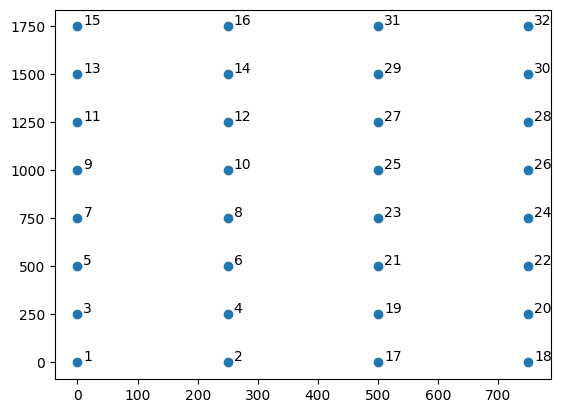

In [9]:
# compute location of microwire arrays
space_between_wires = 250
NChannels = 32

location = np.zeros((NChannels, 2))
for i in range(8):
    location[i*2, :] = [0, i * space_between_wires]
    location[i*2+1, :] = [250, i * space_between_wires]
    location[i*2+16, :] = [500, i * space_between_wires]
    location[i*2+17, :] = [750, i * space_between_wires]

plt.figure()
plt.plot(location[:, 0], location[:, 1], 'o')
for i in range(NChannels):
    plt.annotate(str(i+1), xy = (location[i,0], location[i,1]), xytext = (location[i,0]+10, location[i,1]+10))
plt.show()

In [ ]:
rec.set_channel_locations(location)

In [2]:
# sorted_params = ss.Kilosort2Sorter.default_params()
# sorted_params['minfr_goodchannels'] = 0
# print(sorted_params)

sorted_params = ss.Kilosort2_5Sorter.default_params()
sorted_params['minfr_goodchannels'] = 0
sorted_params['nblocks'] = 0
print(sorted_params)

{'detect_threshold': 6, 'projection_threshold': [10, 4], 'preclust_threshold': 8, 'car': True, 'minFR': 0.1, 'minfr_goodchannels': 0, 'nblocks': 0, 'sig': 20, 'freq_min': 150, 'sigmaMask': 30, 'nPCs': 3, 'ntbuff': 64, 'nfilt_factor': 4, 'NT': None, 'do_correction': True, 'wave_length': 61, 'keep_good_only': False, 'n_jobs': 1, 'total_memory': None, 'chunk_size': None, 'chunk_memory': None, 'chunk_duration': '1s', 'progress_bar': True}


In [ ]:
# Change the Kilosort path when using different computers
ss.Kilosort3Sorter.set_kilosort3_path(r'C:/Users/jiumao/Desktop/KiloSort')
ss.Kilosort2_5Sorter.set_kilosort2_5_path(r'C:/Users/jiumao/Desktop/Kilosort_2_5')
ss.Kilosort2Sorter.set_kilosort2_path(r'C:/Users/jiumao/Desktop/Kilosort_2')

In [ ]:
# output = ss.run_kilosort2(rec,**sorted_params)
output = ss.run_kilosort2_5(rec,**sorted_params)
# output = ss.run_kilosort3(rec,**sorted_params)